## Linear Regression
Here we can do linear regression by applying the squared (or absolute) trick at every point in our data all at the same time, and repeating this process many times.
$$
y = (w1 + p*(q-q`)*alpha)x + (w2 + 1*(q-q`)*alpha)
$$

or 
$$
y = (w1 + p*error*alpha)x + (w2 + 1*error*alpha)
$$

from equation we can see that for best fit line we have to add p* error* alpha in slope and 1* error* alpha in y_intercept or in other words we are updating our slope and intercept by adding these values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = np.loadtxt('data.csv', delimiter = ',')

In [3]:
x = data[:,:-1]
y = data[:,-1]

#showing data in pandas
df = pd.DataFrame(columns=['x','y'])
t=[]
for i in range(0,len(x)):
    t.append(x[i][0])
df['y'] = y
df['x'] = t
df

,x,y
0,-0.72407,2.23863
1,-2.40724,-0.00156
2,2.64837,3.01665
3,0.36092,2.31019
4,0.67312,2.05950
...,...,...
95,-0.92159,1.21538
96,0.76953,2.39377
97,0.03283,1.55730
98,-1.07619,0.70874


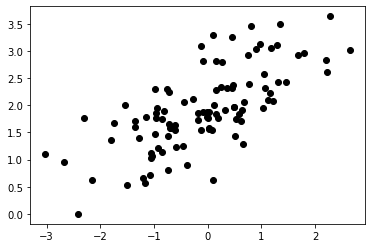

In [4]:
plt.plot(x,y,'o', color='black')

In [5]:
#y = (w1 + p*(q-q`)*alpha)x + (w2 + 1*(q-q`)*alpha)
''' start initially with w_1 = 0 and w_2 = 0 and generate a line'''
y_pred = []
w_1 = 0
w_2 = 0
for i in range(0,len(x)):
    y_pred.append((w_1*x[i][0])+w_2)

In [6]:
df['y_pred when w_1 and w_2 are 0'] = y_pred
df

,x,y,y_pred when w_1 and w_2 are 0
0,-0.72407,2.23863,0.0
1,-2.40724,-0.00156,0.0
2,2.64837,3.01665,0.0
3,0.36092,2.31019,0.0
4,0.67312,2.05950,0.0
...,...,...,...
95,-0.92159,1.21538,0.0
96,0.76953,2.39377,0.0
97,0.03283,1.55730,0.0
98,-1.07619,0.70874,0.0


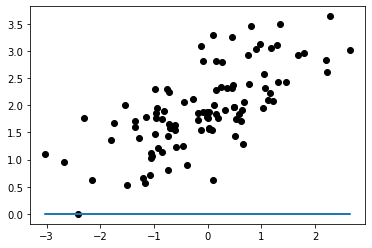

In [7]:
plt.plot(x,y,'o', color='black')
plt.plot(x,y_pred)

In [27]:
'''Error/(q-q') between line and points '''
error_when_w_and_b_are_zero = []
for i in range(0,len(y)):
    error_when_w_and_b_are_zero.append(y[i] - y_pred[i])
df['error when w and b are 0'] = error_when_w_and_b_are_zero
print("Sum of mean square Error",sum([i**2 for i in error_when_w_and_b_are_zero])/len(error_when_w_and_b_are_zero))
df


Sum of mean square Error 4.2541289696539994


,x,y,y_pred when w_1 and w_2 are 0,error when w and b are 0,best_line,Error_with_new_slope_and_intercept
0,-0.72407,2.23863,0.0,2.23863,1.643509,0.595121
1,-2.40724,-0.00156,0.0,-0.00156,0.984646,-0.986206
2,2.64837,3.01665,0.0,3.01665,2.963624,0.053026
3,0.36092,2.31019,0.0,2.31019,2.068220,0.241970
4,0.67312,2.05950,0.0,2.05950,2.190428,-0.130928
...,...,...,...,...,...,...
95,-0.92159,1.21538,0.0,1.21538,1.566192,-0.350812
96,0.76953,2.39377,0.0,2.39377,2.228167,0.165603
97,0.03283,1.55730,0.0,1.55730,1.939792,-0.382492
98,-1.07619,0.70874,0.0,0.70874,1.505675,-0.796935


In [28]:
#w_1_new = w_1_old + (y-y_pred) * p * learnung_rate  
#w_2_new = w_2_old + (y-y_pred) * alpha
'''Now we want to make above line best fit for all points which can be done by updating our slope and intercept'''

def plott():
    w_1 = 0
    w_2 = 0
    plt.plot(x,y,'o', color='black')
    for i in range(0,len(y)):
         w_1 += (error_when_w_and_b_are_zero[i]) * x[i][0] * 0.01
         w_2 += (error_when_w_and_b_are_zero[i]) * 0.01
    y_pred = []
    for i in range (0,len(y)):
         y_pred.append((w_1 * x[i][0] ) + w_2)
    plt.plot(x,y_pred)   
    Error_with_new_slope_and_intercept = []
    for i in range(0,len(y)):
         Error_with_new_slope_and_intercept.append(y[i]-y_pred[i])
    df['best_line'] = y_pred
    df[' Error_with_new_slope_and_intercept'] =  Error_with_new_slope_and_intercept
    print("Sum of mean square Error",sum([i**2 for i in Error_with_new_slope_and_intercept])/len(Error_with_new_slope_and_intercept))

Sum of mean square Error 0.28338270641361385


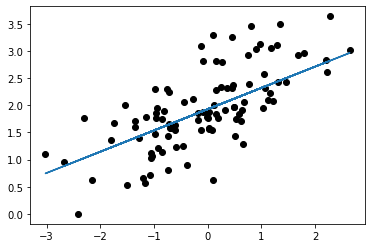

In [29]:
plott()

In [11]:
'''In 100 iterations this is how our line became best fitted'''
def plot2():
    plt.plot(x,y,'o', color='black')
    w_1 = 0
    w_2 = 0
    for z in range(0,len(y)): #100 iterations
        y_pred = []
        for i in range(0,len(y)):
             y_pred.append((w_1 * x[i][0] ) + w_2)
        plt.plot(x,y_pred)
        w_1 += (error_when_w_and_b_are_zero[z]) * x[z][0] * 0.01
        w_2 += (error_when_w_and_b_are_zero[z]) * 0.01




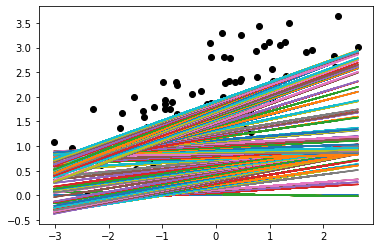

In [12]:
plot2()     

In [13]:
df

,x,y,y_pred when w_1 and w_2 are 0,error when w and b are 0,best_line,Error_with_new_slope_and_intercept
0,-0.72407,2.23863,0.0,2.23863,1.643509,0.595121
1,-2.40724,-0.00156,0.0,-0.00156,0.984646,-0.986206
2,2.64837,3.01665,0.0,3.01665,2.963624,0.053026
3,0.36092,2.31019,0.0,2.31019,2.068220,0.241970
4,0.67312,2.05950,0.0,2.05950,2.190428,-0.130928
...,...,...,...,...,...,...
95,-0.92159,1.21538,0.0,1.21538,1.566192,-0.350812
96,0.76953,2.39377,0.0,2.39377,2.228167,0.165603
97,0.03283,1.55730,0.0,1.55730,1.939792,-0.382492
98,-1.07619,0.70874,0.0,0.70874,1.505675,-0.796935
